In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid", font_scale=1.5, rc={"figure.figsize": (7, 5)})

rng = np.random.default_rng()

In [14]:
pop = pd.read_csv("survey lung cancer.csv")
pop

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [15]:
pop["Target"] = (pop["LUNG_CANCER"] == "YES").astype(int)
np.mean(pop["Target"])

0.8737864077669902

In [16]:
sample_A = pop[pop["AGE"] >= 65]
np.mean(sample_A["Target"])

0.911504424778761

In [17]:
#relative size of sample A
len(sample_A)/len(pop)

0.3656957928802589

In [27]:
pop['Clean_age'] = pd.qcut(pop['AGE'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [28]:
#Checking for bias in sample A
pop_by_age_ac = pop.groupby(["Clean_age","ALCOHOL CONSUMING"]).agg("mean", numeric_only = True).reset_index()
pop_by_age_ac

,Clean_age,ALCOHOL CONSUMING,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,Target
0,Q1,1,51.194444,1.694444,1.805556,1.583333,1.527778,1.527778,1.722222,1.333333,1.333333,1.333333,1.722222,1.416667,1.361111,0.722222
1,Q1,2,53.857143,1.547619,1.357143,1.261905,1.500000,1.666667,1.714286,1.761905,1.714286,1.595238,1.642857,1.476190,1.809524,0.976190
2,Q2,1,60.194444,1.472222,1.666667,1.583333,1.500000,1.472222,1.777778,1.333333,1.333333,1.444444,1.722222,1.527778,1.388889,0.750000
3,Q2,2,60.093023,1.651163,1.418605,1.534884,1.441860,1.395349,1.465116,1.651163,1.674419,1.558140,1.465116,1.558140,1.697674,0.953488
4,Q3,1,65.526316,1.631579,1.684211,1.605263,1.710526,1.394737,1.763158,1.342105,1.447368,1.526316,1.710526,1.394737,1.289474,0.736842
5,Q3,2,65.511111,1.466667,1.511111,1.600000,1.355556,1.355556,1.533333,1.622222,1.622222,1.688889,1.577778,1.488889,1.644444,0.911111
6,Q4,1,74.518519,1.555556,1.777778,1.592593,1.629630,1.666667,1.851852,1.481481,1.555556,1.592593,1.814815,1.592593,1.481481,0.888889
7,Q4,2,72.857143,1.500000,1.476190,1.285714,1.428571,1.619048,1.666667,1.809524,1.690476,1.833333,1.571429,1.333333,1.666667,1.000000


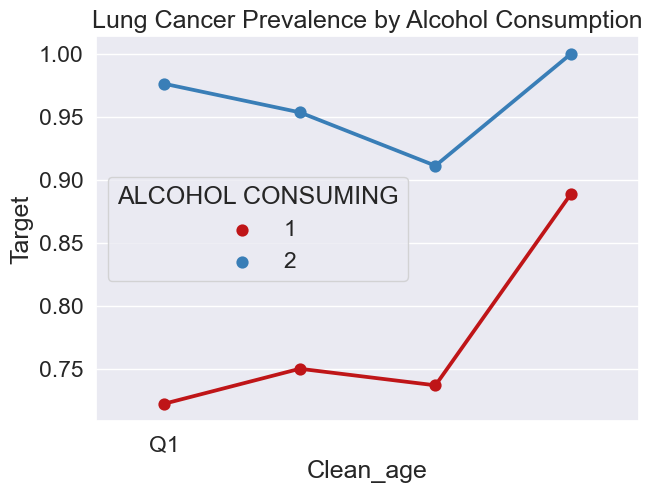

In [39]:
import matplotlib.ticker as ticker
fig = plt.figure();
red_blue = ["#bf1518", "#397eb7"]
with sns.color_palette(sns.color_palette(red_blue)):
    ax = sns.pointplot(data=pop_by_age_ac, x = "Clean_age", y = "Target", hue = "ALCOHOL CONSUMING")

ax.set_title("Lung Cancer Prevalence by Alcohol Consumption")
fig.canvas.draw()
new_ticks = [i.get_text() for i in ax.get_xticklabels()];
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10]);

In [41]:
## By default, replace = False
n = len(sample_A)
Sample_Random = pop.sample(n, replace = False)

np.mean(Sample_Random["Target"])

0.8761061946902655

In [42]:
np.mean(pop["Target"])

0.8737864077669902

In [53]:
## Smaller?
n = int(len(sample_A)/2)
Sample_Random = pop.sample(n, replace = False)

np.mean(Sample_Random["Target"])

0.8571428571428571

In [56]:
poll_result = []
nrep = 1000   # number of simulations
n = int(len(pop)/8)       # size of our sample
for i in range(0,nrep):
    Sample_Random = pop.sample(n, replace = False)
    poll_result.append(np.mean(Sample_Random["Target"]))

In [62]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(
    y=poll_result,
    box_visible=True,
    meanline_visible=True,
    fillcolor='lightseagreen',
    line_color='darkgreen',
    opacity=0.6,
    x0='Poll Results'
))

fig.update_layout(
    title="Distribution of Poll Results",
    yaxis_title="Votes",
)

fig.show()

In [64]:
np.random.multinomial(100, [0.60, 0.30, 0.10], size=20)

array([[60, 35,  5],
       [59, 29, 12],
       [60, 31,  9],
       [50, 33, 17],
       [59, 29, 12],
       [54, 40,  6],
       [61, 27, 12],
       [58, 30, 12],
       [60, 28, 12],
       [62, 30,  8],
       [57, 33, 10],
       [62, 30,  8],
       [62, 21, 17],
       [59, 30, 11],
       [54, 33, 13],
       [55, 32, 13],
       [61, 33,  6],
       [60, 37,  3],
       [54, 29, 17],
       [61, 29, 10]])